## Exercise 9.6
### Metrics for classification

In this exercise, you will dive more deeply into evaluating the performance of binary classifiers by computing a confusion matrix and generating a classification report.

You may have noticed that the classification report consisted of three columns, and an additional *support* column. The support gives the number of samples that lie in that class . The *precision*, *recall*, and *f1-score* columns, then, gave the respective metrics for that particular class.

Here, you'll work with the [PIMA Indians](https://www.kaggle.com/uciml/pima-indians-diabetes-database) dataset obtained from the UCI Machine Learning Repository. The goal is to predict whether or not a given female patient will contract diabetes based on features such as BMI, age, and number of pregnancies. Therefore, it is a binary classification problem. A target value of `0` indicates that the patient *does not* have diabetes, while a value of `1` indicates that the patient *does* have diabetes. The dataset has been preprocessed to deal with missing values.

The dataset has been loaded into a DataFrame `df` and the feature and target variable arrays `X` and `y` have been created for you. In addition, `sklearn.model_selection.train_test_split` and `sklearn.neighbors.KNeighborsClassifier` have already been imported.

Your job is to train a k-NN classifier to the data and evaluate its performance by generating a confusion matrix and classification report.

In [1]:
# all main imports here
import numpy as np
import pandas as pd

# import the dataset
df = pd.read_csv('https://github.com/huangpen77/BUDT704/raw/main/Chapter10/diabetes.csv')
df.head(2)

pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   

   diabetes  
0         1  
1         0

#### Instructions (4 points)

- Import `classification_report` and `confusion_matrix` from `sklearn.metrics`.
- Create training and testing sets with 40% of the data used for testing. Use a random state of `42`.
- Instantiate a k-NN classifier with `6` neighbors, fit it to the training data, and predict the labels of the test set.
- Compute and print the confusion matrix and classification report using the `confusion_matrix()` and `classification_report()` functions.

In [2]:
# prepare X and y arrays
y = df['diabetes']
X = df.drop('diabetes', axis=1)

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# Import classfication_report and confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[176  30]
 [ 56  46]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

    accuracy                           0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



<div class="alert alert-block alert-success">
<b>NOTE</b>

**precision**

Precision is the ability of a classiifer not to label an instance positive that is actually negative. For each class it is defined as as the ratio of true positives to the sum of true and false positives. __Said another way, “for all instances classified positive, what percent was correct?__”

**recall**

Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives. __Said another way, “for all instances that were actually positive, what percent was classified correctly?__”

**f1 score**

The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

**support**

Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.
    
</div>

## Exercise 9.7
### 1. Building a logistic regression model

Time to build your first logistic regression model! Scikit-learn makes it very easy to try different models, since the `Train-Test-Split/Instantiate/Fit/Predict` paradigm applies to all classifiers and regressors - which are known in scikit-learn as 'estimators'. You'll see this now for yourself as you train a logistic regression model on exactly the same data as in the previous exercise. Will it outperform k-NN? There's only one way to find out!

The feature and target variable arrays `X` and `y` have been pre-loaded, and `train_test_split` has been imported for you from `sklearn.model_selection`.

In [3]:
# all main imports here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import the dataset
df = pd.read_csv('https://github.com/huangpen77/BUDT704/raw/main/Chapter10//diabetes.csv')
df.head(2)
# prepare X and y arrays
y = df['diabetes']
X = df.drop('diabetes', axis=1)

#### Instructions (4 points)

- Import`LogisticRegression` from `sklearn.linear_model`.
- Create training and test sets with 40% (or `0.4`) of the data used for testing. Use a random state of `42`. This has been done for you.
- Instantiate a `LogisticRegression` classifier called `logreg`.
- Fit the classifier to the training data and predict the labels of the test set.
- Compute and print the confusion matrix and classification report. This has been done for you.

In [4]:
# Import the necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the logistic regression classifier using liblinear solver: logreg
logreg = LogisticRegression(solver='liblinear')

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[174  32]
 [ 36  66]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       206
           1       0.67      0.65      0.66       102

    accuracy                           0.78       308
   macro avg       0.75      0.75      0.75       308
weighted avg       0.78      0.78      0.78       308



### 2. Plotting an ROC curve

Classification reports and confusion matrices are great methods to quantitatively evaluate model performance, while ROC curves provide a way to visually evaluate models. Most classifiers in scikit-learn have a `.predict_proba()` method which returns the probability of a given sample being in a particular class. Having built a logistic regression model, you'll now evaluate its performance by plotting an ROC curve. In doing so, you'll make use of the `.predict_proba()` method and become familiar with its functionality.

Here, you'll continue working with the PIMA Indians diabetes dataset. The classifier has already been fit to the training data and is available as `logreg`.

#### Instructions (4 points)

- Import `roc_curve` from `sklearn.metrics`.
- Using the `logreg` classifier, which has been fit to the training data, compute the predicted probabilities of the labels of the test set `X_test`. Save the result as `y_pred_prob`.
- Use the `roc_curve()` function with `y_test` and `y_pred_prob` and unpack the result into the variables `fpr`, `tpr`, and `thresholds`.
- Plot the ROC curve with `fpr` on the x-axis and `tpr` on the y-axis.

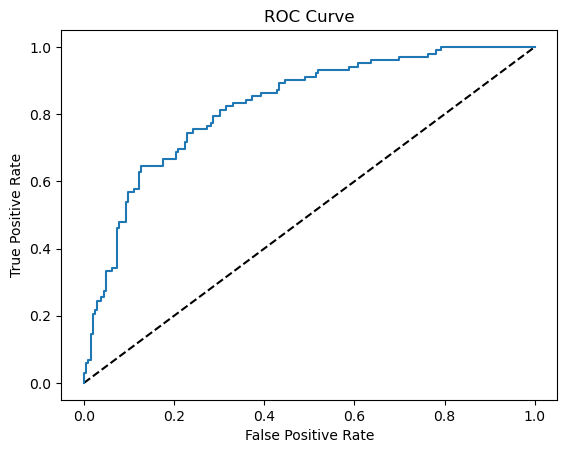

In [5]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the diagnal line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the ROC curve with `fpr` on the x-axis and `tpr` on the y-axis.
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## Exercise 9.8
### AUC computation

Say you have a binary classifier that in fact is just randomly making guesses. It would be correct approximately 50% of the time, and the resulting ROC curve would be a diagonal line in which the True Positive Rate and False Positive Rate are always equal. The Area under this ROC curve would be 0.5. This is one way in which the AUC is an informative metric to evaluate a model. If the AUC is greater than 0.5, the model is better than random guessing. Always a good sign!

In this exercise, you'll calculate AUC scores using the `roc_auc_score()` function from `sklearn.metrics` as well as by performing cross-validation on the diabetes dataset.

`X` and `y`, along with training and test sets `X_train`, `X_test`, `y_train`, `y_test`, have been pre-loaded for you, and a logistic regression classifier `logreg` has been fit to the training data.

In [6]:
# all main imports here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import the dataset
df = pd.read_csv('https://github.com/huangpen77/BUDT704/raw/main/Chapter10/diabetes.csv')
df.head(2)

pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   

   diabetes  
0         1  
1         0

In [7]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

df.insulin.replace(0, np.nan, inplace=True)
df.triceps.replace(0, np.nan, inplace=True)
df.bmi.replace(0, np.nan, inplace=True)
# fill missing data
df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x: x.fillna(x.mean()))
y = df['diabetes']
X = df.drop('diabetes', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# create a logistic regression classifier
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

#### Instructions (4 points)

- Import `roc_auc_score` from `sklearn.metrics`, and `cross_val_score` from `sklearn.model_selection`.
- Compute predicted probabilities `y_pred_prob` by using the `predict_proba()` method of classifier `logreg` on the test dataset.
- compute and print AUC score by using the `roc_auc_score()` function
- Compute cross-validated AUC scores using the `cross_val_score()` function. Use 5 folds cross validation, and `roc_auc` as the scoring method.

In [8]:

# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
auc = roc_auc_score(y_test, y_pred_prob)
print("AUC: {}".format(auc))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')
# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.8253854940034266
AUC scores computed using 5-fold cross-validation: [0.80166667 0.8062963  0.81481481 0.86245283 0.8554717 ]


## Exercise 9.9
### Hyperparameter tuning with GridSearchCV

You have seen how to tune the `n_neighbors` parameter of the `KNeighborsClassifier()` using GridSearchCV on the voting dataset. You will now practice this yourself, but by using logistic regression on the diabetes dataset instead!

Like the alpha parameter of lasso and ridge regularization that you saw earlier, logistic regression also has a regularization parameter: $C$. $C$ controls the *inverse* of the regularization strength, and this is what you will tune in this exercise. A large $C$ can lead to an overfit model, while a small $C$ can lead to an underfit model.

The hyperparameter space for $C$ has been setup for you. Your job is to use GridSearchCV and logistic regression to find the optimal $C$ in this hyperparameter space. The feature array is available as `X` and target variable array is available as `y`.

In [9]:
# Import packages
import numpy as np
import pandas as pd

df = pd.read_csv('https://github.com/huangpen77/BUDT704/raw/main/Chapter10/diabetes.csv')

df.insulin.replace(0, np.nan, inplace=True)
df.triceps.replace(0, np.nan, inplace=True)
df.bmi.replace(0, np.nan, inplace=True)
# impute missing values
df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x: x.fillna(x.mean()))

# generate features and target
y = df['diabetes']
X = df.drop('diabetes', axis=1)


#### Instructions (4 points)

- Import `LogisticRegression` from `sklearn.linear_model` and `GridSearchCV` from `sklearn.model_selection`.
- Setup the hyperparameter grid by using `c_space` as the grid of values to tune $C$ over. This has been done for you.
- Instantiate a logistic regression classifier called `logreg`.
- Use `GridSearchCV` with 5-fold cross-validation to tune $C$:
    - Inside `GridSearchCV()`, specify the classifier, parameter grid, and number of folds (5 folds) to use. Store the return value in `logreg_cv`.
    - Use the `.fit()` method on `logreg_cv` to fit it to the data `X` and `y`.
- Print the best parameter and best score obtained from `GridSearchCV` by accessing the `best_params_` and `best_score_` attributes of `logreg_cv`.

In [10]:
# eliminate warnings
import warnings
warnings.filterwarnings('ignore')

# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-4, 4, 50, base=10)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 2222.996482526191}
Best score is 0.7851965028435617
